# What is Transfer Learning 

**Transfer learning** is the reuse of a **pre-trained model** on a new problem. It’s currently very popular in deep learning because it can train deep neural networks with comparatively little data. This is very useful in the data science field since most real-world problems typically do not have millions of labeled data points to train such complex models.

# Why Transfer Learning? 
1. Saves Data
2. Models Trained using this method are more accurate
3. Saves a lot of time and computer processing


To download Dataset Follow the link : <a href = 'https://www.kaggle.com/datasets/salader/dogs-vs-cats'>Kaggle</a>

Let's Start With Importing important modules

In [4]:
import tensorflow 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten 
from keras.applications.vgg16 import VGG16

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg"/>

# For Transfer Learning There Are two ways you can do it. 

1. We can exclude the **last layers** And add our own but in this method we are expecting that our data is already trained over with the inputs that we are giving (in imagenet data dog, and cat labels are already there in the training of VGG16) our data hence we don't need to extract any features using cnn layers so we can freeze them, This method is knowns as **feature extraction**.

2. We can **Fine Tune** Our model, in this method we don't **freeze** all CNN layers like we can incude layers Conv5-1,conv5-2,conv5-3,pooling in training with dense layers. Usually **Fine Tuning** is used when our pre-trained model has some similar data but not completely similar for eg image net maybe not trained over phone - tablet data so using Fine tuning we can train our models few layers to get good accuracy for our models.

# First Method of Transfer Learning

In [34]:
# include top = False Means Removing Dense Layers hence we will be adding our own layers 
all_layers = VGG16(
    include_top = False,
    input_shape=(150,150,3)
)

In [35]:
# Lets create a model
model = Sequential()
model.add(all_layers)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
# Lets Try First Method Freezing All Trainable layers and only changing Dense Layers.
all_layers.trainable = False

In [37]:
# Lets do data augmentation For lowering overfiting and increasing accuracy.
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True
                    )
test_datagen = ImageDataGenerator(rescale = 1./255)
# classmode = binary because we have only 2 labels
train_generator  = train_datagen.flow_from_directory('train',
                                                    target_size = (150,150),
                                                     batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
validation_generator  = test_datagen.flow_from_directory('test',
                                                    target_size = (150,150),
                                                     batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [40]:
history = model.fit(
        train_generator,
        epochs=5,
        validation_data=validation_generator)

Epoch 1/5
625/625 [==============================] - 706s 1s/step - loss: 0.3125 - accuracy: 0.8637 - val_loss: 0.2104 - val_accuracy: 0.9120
Epoch 2/5
625/625 [==============================] - 729s 1s/step - loss: 0.2370 - accuracy: 0.8995 - val_loss: 0.2189 - val_accuracy: 0.9066
Epoch 3/5
625/625 [==============================] - 726s 1s/step - loss: 0.2196 - accuracy: 0.9044 - val_loss: 0.2215 - val_accuracy: 0.9034
Epoch 4/5
625/625 [==============================] - 726s 1s/step - loss: 0.2104 - accuracy: 0.9111 - val_loss: 0.1928 - val_accuracy: 0.9160
Epoch 5/5
625/625 [==============================] - 748s 1s/step - loss: 0.1979 - accuracy: 0.9163 - val_loss: 0.2184 - val_accuracy: 0.9060


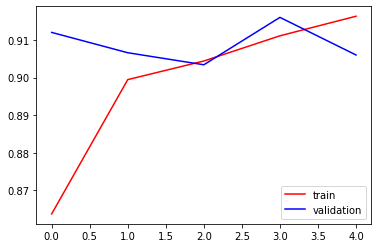

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

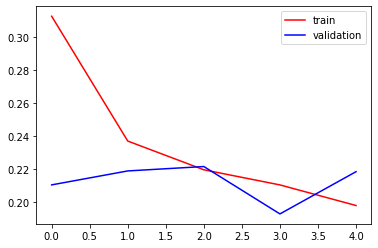

In [42]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# The other method is Fine Tuning
now this will take more time as layers will get trained so let's start working on it.

In [51]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg"/>

Now we will freeze all other layers expect the 5th block of our VGG16 model which we will train and add dense layers to get better result this process is fine tuning.

In [52]:
# To check all the layers we have we can see and we can just activate one block to train
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [53]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base.layers:
    print(layer.name,layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [54]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [55]:
# Normalization to 0 and 1.
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [56]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

C:\Users\tushar nautiyal\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [58]:
# generators
# We can use the same generators as previous one for this code.
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 898s 1s/step - loss: 0.2340 - accuracy: 0.9019 - val_loss: 0.1623 - val_accuracy: 0.9340
Epoch 2/10
625/625 [==============================] - 959s 2s/step - loss: 0.1303 - accuracy: 0.9481 - val_loss: 0.1362 - val_accuracy: 0.9464
Epoch 3/10
625/625 [==============================] - 894s 1s/step - loss: 0.0900 - accuracy: 0.9667 - val_loss: 0.1271 - val_accuracy: 0.9484
Epoch 4/10
625/625 [==============================] - 896s 1s/step - loss: 0.0622 - accuracy: 0.9797 - val_loss: 0.1278 - val_accuracy: 0.9502
Epoch 5/10
625/625 [==============================] - 896s 1s/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.1311 - val_accuracy: 0.9514
Epoch 6/10
625/625 [==============================] - 896s 1s/step - loss: 0.0266 - accuracy: 0.9929 - val_loss: 0.1520 - val_accuracy: 0.9494
Epoch 7/10
625/625 [==============================] - 895s 1s/step - loss: 0.0163 - accuracy: 0.9961 - val_loss: 0.2577 - val_accuracy: 0.9304

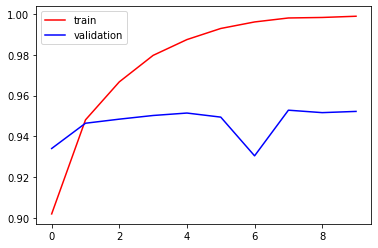

In [59]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

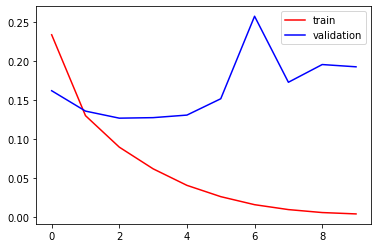

In [60]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()